# HHL algorithm

---
Overview
---

We will discuss a hybrid classical-quantum algorithm to solve the linear
system of equations

$$
Ax=b
$$ (linear-sys)

where $A\in\mathcal{M}_{N}\left(\mathbb{C}\right)$ is a complex matrix of
order $N$, following the HHL algorithm.

Without lost of generality, we will assume that
$\left\Vert b\right\Vert =1$ where
$\left\Vert b\right\Vert =\sqrt{b^{*}b}$ is the usual hermitian norm in
$\mathbb{C}^{N}$ ($b^{*}$ is the conjugate transpose of $b$), and that
$A$ is hermitian, $A=A^{*}$. The first assumption can be made by simply
rescaling of the solution by $\left\Vert b\right\Vert$, while the second
assumption be realized in terms of the system 

$$
\left(\begin{array}{cc}
0 & A\\
A^{*} & 0
\end{array}\right)\left(\begin{array}{c}
0\\
x
\end{array}\right)=\left(\begin{array}{c}
b\\
0
\end{array}\right)
$$ 

which is equivalent to $Ax=b$ and has an hermitian
coefficient matrix.

Let us further assume that $A$ is invertible, that is, the linear system
$Ax=b$ has the unique solution $x=A^{-1}b$. This is equivalent to the
assumption that all eigenvalues of $A$ are non-zero. By the spectral
theorem for hermitian matrices, the eigenvalues
$\lambda_{0}$,\...,$\lambda_{N-1}$ of $A$ lie in the compact set
$\left[\lambda_{min},\lambda_{max}\right]\subset\mathbb{R}$ with
$\lambda_{min}>0$. In addition, $A$ has an orthonormal basis of
eigenvectors
$\left\{ \left|v_{0}\right\rangle ,...,\left|v_{N-1}\right\rangle \right\}$,
which allows $A$ to be written in terms of the orthogonal projection
operators

$$
A=\sum_{i=0}^{N-1}\lambda_{i}\left|v_{i}\right\rangle \left\langle v_{i}\right|\,.
$$

Likewise, the inverse matrix $A^{-1}$ can be written as

$$
A^{-1}=\sum_{i=0}^{N-1}\lambda_{i}^{-1}\left|v_{i}\right\rangle \left\langle v_{i}\right|\,,
$$

so for $b$ given by the linear combination

$$
b=\sum_{i=0}^{N-1}b_{i}\left|v_{i}\right\rangle
$$ 

the solution to the system {eq}`linear-sys` is given by

$$
x=A^{-1}b=\sum_{i=0}^{N-1}\frac{b_{i}}{\lambda_{i}}v_{i}
$$(solution)

Thus, the problem of finding the solution of $Ax=b$ reduces to the
problem of diagonalizing $A$, or rather, of finding its eigenvalues.

---
Pre-processing
---

In order to express this problem in terms of an $n$-qubit quantum
system, we need to extend $A$ to a $2^{n}\times2^{n}$ matrix by
completing it with the identity, so the linear system becomes

$$
\left(\begin{array}{cc}
A & 0\\
0 & I
\end{array}\right)\left(\begin{array}{c}
x\\
0
\end{array}\right)=\left(\begin{array}{c}
b\\
0
\end{array}\right)
$$ 

For instance, if $A\in M_{3}\left(\mathbb{C}\right)$, then we consider the alternative
system 

$$
\left(\begin{array}{cc}
A & 0\\
0 & 1
\end{array}\right)\left(\begin{array}{c}
x\\
0
\end{array}\right)=\left(\begin{array}{c}
b\\
0
\end{array}\right)\,,
$$ 

where the coefficient matrix is now of order
$2^{2}$.

Another key adaptation for a quantum system is the necessity of having
the eigenvalues in the interval $\left(0,1\right]$. This can be
accomplished by rescaling and shifting the spectrum of $A$. However, it
is important to accomplish this without prior knowledge of the point
spectrum of $A$. This can be achieved by considering the spectral radius
$\rho\left(A\right)$ of $A$, which is defined by

$$
\rho\left(A\right)=\max\left\{ \left|\lambda_{1}\right|,...,\left|\lambda_{n}\right|\right\} \,.
$$

Because $\rho\left(A\right)\leq\left\Vert A\right\Vert$ for any operator
norm $\left\Vert \cdot\right\Vert$, we can choose a convenient matrix
norm, such as the maximum absolute row sum,

$$
\rho\equiv\left\Vert A\right\Vert _{\infty}=\max_{1\leq i\leq N}\left\{ \sum_{j=1}^{N}\left|a_{ij}\right|\right\}
$$

so that $spec\left(A\right)=\left[\lambda_{min},\lambda_{max}\right]\subset\left[-\rho,\rho\right]$.
Consider the matrix 

$$
\tilde{A}=\Omega\left(A+\omega I\right)
$$ 

where $\Omega>0$ and $\omega$ are real numbers. The eigenvalues of $\tilde{A}$
are the $\tilde{\lambda}$ roots of the characteristic polynomial

$$
\det\left(\tilde{A}-\tilde{\lambda}I\right)=\det\left(\Omega\left(A+\omega I\right)-\tilde{\lambda}I\right)=\Omega^{N}\det\left(A+\omega-\frac{\tilde{\lambda}}{\Omega}\right)\,.
$$

The last determinant tells us that

$$
\lambda=\frac{\tilde{\lambda}}{\Omega}-\omega\Leftrightarrow\tilde{\lambda}=\Omega\left(\omega+\lambda\right)
$$ (eigenvalue)

are the eigenvalues of $A$, so we find a relation between the spectrum
of $A$ and that of $\tilde{A}$. Let us now impose the condition that the
spectrum of $\tilde{A}$ is in $\left(0,1\right]$: 

$$
\begin{aligned}
\tilde{\lambda}\left(\lambda=-\rho\right) & =\Omega\left(\omega-\rho\right)=\frac{1}{2^{k}}\\
\tilde{\lambda}\left(\lambda=\rho\right) & =\Omega\left(\omega+\rho\right)=1-\frac{1}{2^{k}}\end{aligned}
$$

for integer $k>1$. The solution for any $k$ is

$$
\Omega=\left(\frac{1}{2}-\frac{1}{2^{k}}\right)\rho^{-1}\,,\,\,\omega=\frac{1}{1-2^{1-k}}\rho
$$

For instance, consider the Hadamard matrix

$$
H=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1\\
1 & -1
\end{array}\right)\,.
$$ 

It is hermitian and $\left\Vert H\right\Vert _{\infty}=\sqrt{2}$, so
$spec\left(H\right)\subset\left[-\sqrt{2},\sqrt{2}\right]$, which is
true, of course, since its eigenvalues are $\pm1$. For $k=2$, we have
$\Omega=\sqrt{2}/8$ and $\omega=2\sqrt{2}$, so

$$
\tilde{H}=\Omega\left(H+\omega I\right)=\frac{1}{8}\left(\begin{array}{cc}
5 & 1\\
1 & 3
\end{array}\right)\,.
$$ 

One can check that the eigenvalues of $\tilde{H}$ are $\frac{1}{8}\left(4\pm\sqrt{2}\right)$, so
$spec\left(\tilde{H}\right)\subset\left[\frac{1}{4},\frac{3}{4}\right]\subset\left(0,1\right]$.

Finally, it is important to notice that the eigenvector of $A$ belonging
to the eigenvalue $\lambda$ is also an eigenvector of $\tilde{A}$
belonging to $\tilde{\lambda}$. In fact,

$$
\tilde{A}\left|v\right\rangle =\tilde{\lambda}\left|v\right\rangle \Leftrightarrow A\left|v\right\rangle =\frac{1}{\Omega}\left(\tilde{\lambda}-\Omega\omega\right)\left|v\right\rangle =\lambda\left|v\right\rangle 
$$

Therefore, from the solution

$$
\tilde{x}=\tilde{A}^{-1}b=\sum_{i}\frac{b_{i}}{\tilde{\lambda}_{i}}\left|v_{i}\right\rangle
$$

we get the solution

$$
x=A^{-1}b=\sum_{i}\frac{b_{i}}{\lambda_{i}}\left|v_{i}\right\rangle
$$

by simple replacement of each $\tilde{\lambda}_{i}$ for $\lambda_{i}$,
according to {eq}`eigenvalue`.

---
Hybrid HHL
---
Suppose all the necessary pre-processing has been deatlt with, and we
are to apply HHL to the linear system {eq}`linear-sys`
 where $A$ is an hermitian matrix of order
$2^{n}$, whose eigenvalues lie in the interval $\left(0,1\right]$.

Since we can only implement unitary transformations, we consider instead
the unitary matrix $U=e^{2\pi iA}$, whose eigenvalues are
$e^{2\pi i\lambda_{i}}$, $i=0,...,N-1$. So let's say we have prepared a
$n$-qubit state $\left|v\right\rangle$ which is an eigenstate of $A$
with eigenvalue $\lambda$, so

$$
U\left|v\right\rangle =e^{2\pi i\lambda}\left|v\right\rangle \,.
$$ 

We then apply the Quantum Phase Estimation (QPE) algorithm to the state
$\left|v\right\rangle \otimes\left|0\right\rangle ^{\otimes t}$, where
$\left|0\right\rangle ^{\otimes t}$ is a second quantum register with
$t$ qubits. The result is

$$
\left|v\right\rangle \otimes\left|0\right\rangle ^{\otimes t}\overset{QPE}{\mapsto}\left|v\right\rangle \otimes\left|\tilde{\lambda}\right\rangle
$$

where $\left|\tilde{\lambda}\right\rangle$ is the state which outputs
$\lambda$ when measured with the accuracy of $t$ qubits, that is,
$\tilde{\lambda}$ is an approximation of $\lambda$ with $t$ bits of
accuracy. So one would measure $\lambda$ exactly if $2^{t}\lambda$ is an
integer. If we apply QPE to the state
$\left|b\right\rangle \left|0\right\rangle$, then we should arrive at

$$
\left|b\right\rangle \left|0\right\rangle ^{\otimes t}=\sum_{i=0}^{N-1}b_{i}\left|v_{i}\right\rangle \left|0\right\rangle ^{\otimes t}\overset{QPE}{\mapsto}\sum_{i=0}^{N-1}b_{i}\left|v_{i}\right\rangle \left|\tilde{\lambda}_{i}\right\rangle
$$

where $\tilde{\lambda}_{i}$ is the $t$-bit approximation for the
eigenvalue $\lambda_{i}$.

The next step is to get the reciprocals of the eigenvalues, which appear
in the solution of the linear system {eq}`solution`. The idea is to introduce an auxiliar qubit
$\left|0\right\rangle$ and perform a $y$-rotation $R_{y}$ by an
appropriate angle $\theta$. Since

$$
R_{y}\left(\theta\right)\left|0\right\rangle =\cos\frac{\theta}{2}\left|0\right\rangle +\sin\frac{\theta}{2}\left|1\right\rangle
$$

we need $\theta$ to be $2\arcsin f\left(\lambda\right)$ (we could also
work with $\arccos$), where $f\left(\lambda\right)=\frac{\Lambda}{\lambda}$ and $\Lambda$ is a
scaling parameter. In this way, 

$$
R_{y}\left(2\arcsin\frac{\Lambda}{\lambda}\right)=\sqrt{1-\frac{\Lambda^{2}}{\lambda^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda}\left|1\right\rangle
$$

and by measuring the auxiliar qubit we can find the reciprocal of the
eigenvalue, up to a scaling factor. Since all eigenvalues belong to
$\left[\lambda_{min},\lambda_{max}\right]$,
$\lambda\in\left[\lambda_{min},\lambda_{max}\right]$, and so
$\frac{\Lambda}{\lambda}\in\left[\frac{\Lambda}{\lambda_{max}},\frac{\Lambda}{\lambda_{min}}\right]$.
In order to use the function $\arccos$ must choose the scale $\Lambda$
so that $\left[\frac{\Lambda}{\lambda_{max}},\frac{\Lambda}{\lambda_{min}}\right]$
fits the domain of $\arcsin$. This can by accomplished by rescaling by
$\Lambda\leq\lambda_{min}$, so we get
$\left[\frac{\Lambda}{\lambda_{max}},\frac{\Lambda}{\lambda_{min}}\right]=\left[\frac{\lambda_{min}}{\lambda_{max}},1\right]\subset\left(0,1\right]$.
This means
$\arcsin\left(\frac{\Lambda}{\lambda}\right)\in\left(0,\frac{\pi}{2}\right]$,
or equivalently,
$\frac{2}{\pi}\arcsin\left(\frac{\Lambda}{\lambda}\right)\in\left(0,1\right]$.

Therefore, if we could apply rotations
$R_{y}\left(2\arcsin\frac{\Lambda}{\lambda_{i}}\right)$ to the auxiliar
qubit, conditioned on the register
$\left|\tilde{\lambda}_{i}\right\rangle$, we would get the desired
result of inverting the eigenvalues, and arrive at the state

$$
\sum_{i=0}^{N-1}b_{i}\left(\sqrt{1-\frac{\Lambda^{2}}{\lambda_{i}^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \right)\left|v_{i}\right\rangle \left|\tilde{\lambda}_{i}\right\rangle
$$

The final step is to apply the inverse QPE to bring back the register
$\left|\tilde{\lambda}_{i}\right\rangle$ to
$\left|0\right\rangle ^{\otimes t}$:

$$
\sum_{i=0}^{N-1}b_{i}\left(\sqrt{1-\frac{\Lambda^{2}}{\lambda_{i}^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \right)\left|v_{i}\right\rangle \left|\tilde{\lambda}_{i}\right\rangle \overset{QPE^{\dagger}}{\mapsto}\sum_{i=0}^{N-1}b_{i}\left(\sqrt{1-\frac{\Lambda^{2}}{\lambda_{i}^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \right)\left|v_{i}\right\rangle \left|0\right\rangle ^{\otimes t}
$$

Now, measurement values of $1$ of the auxiliar qubit will result in the
state

$$
\sum_{i=0}^{N-1}b_{i}\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \left|v_{i}\right\rangle \left|0\right\rangle ^{\otimes t}
$$

A solution to the problem of efficiently implementing a quantum circuit
to perform eigenvalue inversion does not seem to be a hand. In
([ref1](https://arxiv.org/abs/1207.2485)), the eigenvalue inversion is
done using a combination of Newton's method and bissection, while
([ref2](https://arxiv.org/pdf/2009.04484.pdf)) and
([ref3](https://arxiv.org/pdf/1805.12445.pdf)) use piecewise polynomial
approximation to approximate $\arcsin$. We will adopt a third approach,
which is a hybrid approach, and involves first measuring the QPE circuit
multiple times to get a probability distribution of the eigenvalues.
Having computed the eigenvalues, we can apply the rotations controlled
rotations having the eigenvalues as control. To see how this works, let
the first measured eigenvalue be $\lambda_{1}$, which is stored in
$\left|\lambda_{1}\right\rangle$. So we apply a controlled rotation
$Ry\left(2\arcsin\frac{\Lambda}{\lambda_{1}}\right)$ to the target
qubit, whose control bits are the bits of the measured eigenvalue
$\lambda_{1}$. Repeat for each measured eigenvalue, and we are done.

Putting everything together, we have 

$$
\begin{aligned}
\left|0\right\rangle \left|b\right\rangle \left|0\right\rangle ^{\otimes t}\overset{QPE}{\mapsto}\sum_{i=0}^{N-1}b_{i}\left|0\right\rangle \left|v_{i}\right\rangle \left|\tilde{\lambda}_{i}\right\rangle  & \overset{R_{y}}{\mapsto}\sum_{i=0}^{N-1}b_{i}\left(\sqrt{1-\frac{\Lambda^{2}}{\lambda_{i}^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \right)\left|v_{i}\right\rangle \left|\tilde{\lambda}_{i}\right\rangle \\
 & \overset{QPE^{\dagger}}{\mapsto}\sum_{i=0}^{N-1}b_{i}\left(\sqrt{1-\frac{\Lambda^{2}}{\lambda_{i}^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \right)\left|v_{i}\right\rangle \left|0\right\rangle ^{\otimes t}\\
 & \overset{measurement}{\mapsto}\sum_{i=0}^{N-1}b_{i}\frac{\Lambda}{\lambda_{i}}\left|1\right\rangle \left|v_{i}\right\rangle \left|0\right\rangle ^{\otimes t}\end{aligned}
 $$

Our first task is to create the functions responsible for shifting the operator $A$ so that its eigenvalues are in $(0,1]$, 
and to calculate the eigenvalues of $A$ for known eigenvalues of the shifted operator.

In [1]:
import numpy as np

# given a complex hermitian matrix A, we calculate an upper bound for its spectral radius
#and use it to define a new shifted operator B so that spec(B) \subset [1/2^k,1-1/2^k] for k>1

def shiftop(A,k):
    #get number of rows of A
    N = A.shape[0]
    #calculate p=infty norm
    rho = np.linalg.norm(A,np.inf)
    Omega = (1/2 - 1/2**k)*1/rho
    omega = 1/(1-2**(-k+1))*rho
    shiftA = Omega * (A + omega*np.identity(N))
    return shiftA,omega,Omega 

#calculate eigenvalues of A based on eigenvalues of shiftA
def eigenvals( eigAshift,omega,Omega):
    #eigAshift is array of eigenvalues of Ashift
    lamb = eigAshift/Omega - omega
    return lamb
    
    

As a simple example, let us take the Hadamard operator on $\mathbb{C}^2$ as A, and obtain the corresponding shifted operator.

In [2]:
#test for hadamard
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]], dtype=np.complex128)
shiftH,omega,Omega = shiftop(H,2)
eigHshift = np.linalg.eigvals(shiftH)
print("The eigenvalues of the Hadamard operator are: ",eigenvals(eigHshift,omega,Omega))

The eigenvalues of the Hadamard operator are:  [ 1.+0.j -1.+0.j]


In the following we create the controlled unitary operator used in the QPE subroutine.

In [3]:
#create controlled unitary U = exp(2\pi i shiftH)
from qiskit.extensions import HamiltonianGate
shiftopgate = HamiltonianGate(shiftH,-2*np.pi).control()

Now we put everything together to obtain the aproximate values of the eigenvalues of the shifted operator, using QPE.

In [4]:
#run QPE for hadamard with b=|0> and controlled U
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
from qiskit.circuit.library import StatePreparation, RYGate
from qiskit.circuit import ControlledGate
from qiskit.visualization import plot_histogram


#dft circuit with n qubits
def dft(n):
    dftcirc = QuantumCircuit(n)
    #make the rotations
    for k in range(n-1,-1,-1):
        dftcirc.h(k)
        p=2
        for l in range(k-1,-1,-1):
            dftcirc.cp(2*np.pi/2**p,l,k)
            p+=1
        dftcirc.barrier()
    #now we make the swap operations
    for qubit in range(n//2):
        dftcirc.swap(qubit, n-qubit-1)
    return dftcirc

#qpe circuit
#t counting bits
# eigenvector array "eigenvector"
# controlled unitary gate "unitary"

def qpe(t,eigenvector,unitary):
    U = unitary
    eigenv = eigenvector/np.linalg.norm(eigenvector)
    cqbits = QuantumRegister(t, name="counting qubits")
    psi = QuantumRegister(1,name="psi")
    qpe = QuantumCircuit(cqbits,psi)
    #we initalize the state psi to eigenv
    bstate = StatePreparation(eigenv)
    qpe.append(bstate,psi)
    #we apply the Hadamard gates to the counting qubits
    qpe.h(cqbits)
    #Now we apply the controlled Unitary gates
    repetitions = 1
    for counting_qubits in range(t):
        for i in range(repetitions):
            qpe.append(U,[cqbits[counting_qubits], psi])   #controlled U 
        repetitions *= 2
   
    #now we apply the inverse DFT
    qpe.append(dft(t).inverse(),cqbits)
    
    return qpe, cqbits

#define precison = size of counting bits register
t=10

b = np.array([1,0])
#create circuit
qpeqc, cqbits = qpe(t,b,shiftopgate)
#measure
mbits = ClassicalRegister(t,name="measure bits")
qpeqc.add_register(mbits)
qpeqc.measure(cqbits,mbits)



Now we run the circuit in a simulator to get statistics. From the results we are able to obtain the aproximate values 
of the eigenvectors of the shifted operator.

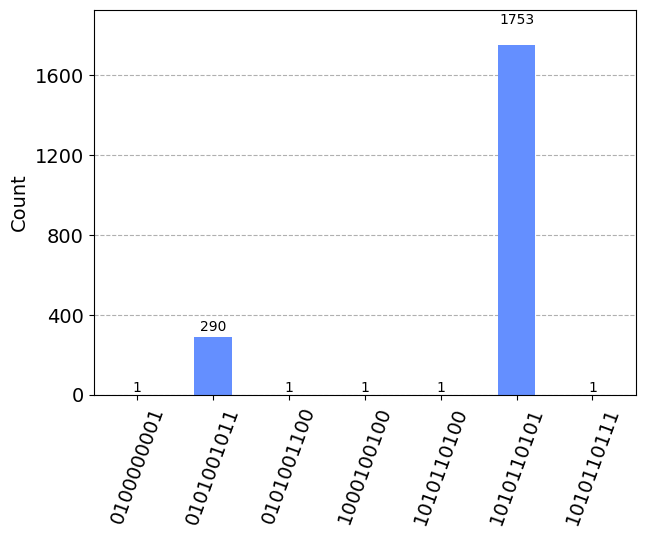

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpeqc, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
#we get the eigenvalues from the probability distribution
#get eigenvalues corresponding to highest counts
sorted_list = sorted(answer.items(), key = lambda x:x[1] , reverse = True)
[phi1,phi2] = [2**(-t)*int(sorted_list[0][0],2),2**(-t)*int(sorted_list[1][0],2)]
#convert back to eigenvalues of H
[lambda1,lambda2]=  [phi1/Omega - omega,phi2/Omega-omega]
#we also need the binaries for phi1 and phi2
[phi1b,phi2b] = [sorted_list[0][0],sorted_list[1][0]]
print("The eigenvalues of the Hadamard operator are: ",lambda1,"and ",lambda2)

The eigenvalues of the Hadamard operator are:  0.9998931827716024 and  -0.9998931827716022


Now that we have the eigenvalues for the Hadamard operator, we can run the HHL algorithm.
First we create a circuit with three quantum registers: the counting qubits for QPE, 
the qubits which encode the rotation angles $2\arcsin{(\Lambda/\lambda)}$ and the target qubit for the rotations.

In [7]:
qpeqc, cqbits = qpe(t,b,shiftopgate)

targetbit = QuantumRegister(1,name="target bit")
cqbits = QuantumRegister(t)
psi    = QuantumRegister(1)

hhlqc = QuantumCircuit(cqbits,targetbit,psi)
hhlqc.append(qpeqc, cqbits[:] + psi[:])
hhlqc.barrier()

#define rotation angles and Lambda
Lambda = np.minimum(lambda1,lambda2)
theta = [2*np.arcsin(Lambda/lambda1),2*np.arcsin(Lambda/lambda2)]

#rotate the target bit controlled by the cqbits register
ry1 = RYGate(theta[0]).control(num_ctrl_qubits=t,  ctrl_state=phi1b)
ry2 = RYGate(theta[1]).control(num_ctrl_qubits=t,  ctrl_state=phi2b)
hhlqc.append(ry1, cqbits[:]+targetbit[:])
hhlqc.append(ry2, cqbits[:]+targetbit[:])
hhlqc.barrier()

#apply inverse QPE
hhlqc.append(qpeqc.inverse(), cqbits[:] + psi[:])

#now we measure the target bit
mbit = ClassicalRegister(1)
hhlqc.add_register(mbit)
hhlqc.barrier()
hhlqc.measure(targetbit,mbit)

#hhlqc.decompose().draw(output="mpl")
    
    

Finally, let us run the circuit and analyze the results.

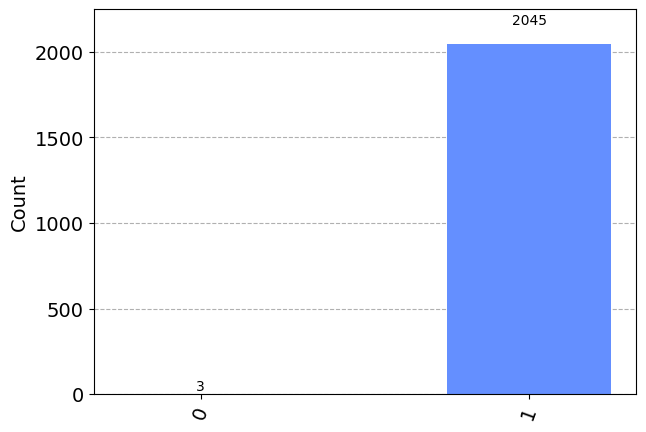

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
#tell the transpile not decompose custom gates
#basis_gates =['u', 'cx', 'id','phi1gate'] 
t_hhl = transpile(hhlqc, backend=aer_sim)
results = aer_sim.run(t_hhl, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

The histogram is expected, since the eigenvalues of the H matrix are close to $\pm$ and $\Lambda$ is then close to $-1$. 
As a result, the state $\sqrt{1-\frac{\Lambda^{2}}{\lambda^{2}}}\left|0\right\rangle +\frac{\Lambda}{\lambda}\left|1\right\rangle$ collapses to $\left|1\right\rangle$
In order to compare the result we obtained with the classical result, we calculate the corresponding state fidelity:

In [9]:
#now let us get the state vector
from qiskit.providers.aer import StatevectorSimulator
from qiskit import execute
from qiskit.quantum_info import partial_trace, state_fidelity, DensityMatrix
simulator = Aer.get_backend('statevector_simulator')
result = execute(hhlqc, simulator).result()
statevector = result.get_statevector(hhlqc)
traced_sv = partial_trace(statevector,list(range(t+1)))
cstate = DensityMatrix(np.linalg.solve(H,b))
print("The state fidelity between the solution from the  hybrid HHL algorithm and the classical solution is: ",round(state_fidelity(traced_sv,cstate),4))

The state fidelity between the solution from the  hybrid HHL algorithm and the classical solution is:  0.9994


This means our quantum solution is in excellent agreement with the classical solution!